#  Training a CNN based on the extracted Spectrograms

In [1]:
import matplotlib.pyplot as plt
from python_speech_features import mfcc, ssc, logfbank
import pandas as pd
import os
import numpy as np
import soundfile
from scipy import signal
import librosa
import matplotlib.pyplot as plt
import librosa.display
from tensorflow import keras

/home/nvidia/github/python_environments/soundflux/lib/python3.5/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/nvidia/github/python_environments/soundflux/lib/python3.5/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/nvidia/github/python_environments/soundflux/lib/python3.5/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/nvidia/github/python_environments/soundflux/lib/python3.5/

/home/nvidia/github/python_environments/soundflux/lib/python3.5/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/nvidia/github/python_environments/soundflux/lib/python3.5/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/nvidia/github/python_environments/soundflux/lib/python3.5/site-packages/librosa/cache.py:36: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if self.cachedir is not None:
/home/nvidia/github/python_environments/soundflux/lib/python3.5/

# Loading the data

In [2]:
URBAN_SOUND_DIR = "/media/nvidia/ROMULO'S/urban_sound_challenge/"

In [3]:
temp = pd.read_json(URBAN_SOUND_DIR+"train_mel_spectrogram_transformed.json")

In [4]:
x = np.array(temp.feature.tolist())

In [5]:
x_features = []
for i in range(x.shape[0]):
    _x_array = np.array([np.array(m) for m in x[i]])
    x_features.append(_x_array[:,:99])
x_features= np.array(x_features)

In [6]:
x_features.shape

(5435, 23, 99)

In [7]:
encoded_classes = {'siren' :0,
 'street_music' :1,
 'engine_idling':2,
 'jackhammer':3,
 'car_horn':4,
 'drilling':5,
 'dog_bark':6,
 'air_conditioner':7,
 'children_playing':8,
 'gun_shot':9}

In [8]:
def find_class(x):
    return encoded_classes[x]

In [9]:
temp['label_encoded'] = temp['label'].apply(find_class) 

In [10]:
y= np.array(temp.label_encoded.tolist())

In [11]:
y.shape

(5435,)

# Simple NN Architecture

In [137]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD

In [138]:
tf.keras.backend.clear_session()

In [139]:
conv_layer = keras.layers.Conv1D(80, (3),
                                 input_shape = (23,99),
                                 strides=1, padding='same', 
                                 data_format='channels_last', 
                                 dilation_rate=1, 
                                 activation=tf.nn.relu, 
                                 use_bias=True, 
                                 kernel_initializer='glorot_uniform', 
                                 bias_initializer='zeros', 
                                 kernel_regularizer=None, 
                                 bias_regularizer=None, 
                                 activity_regularizer=None,
                                 kernel_constraint=None, bias_constraint=None)

In [140]:
model = keras.Sequential([
    conv_layer,
    keras.layers.Flatten(input_shape=(23,99)),
    keras.layers.Dense(3000, activation=tf.nn.tanh),
    keras.layers.Dropout(0.2, noise_shape=None, seed=None),
    keras.layers.Dense(1200, activation=tf.nn.tanh),
    keras.layers.Dense(500, activation=tf.nn.tanh),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dropout(0.2, noise_shape=None, seed=None),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [141]:
epochs = 80
learning_rate = 0.05
decay_rate = learning_rate / (epochs*3)
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [142]:
model.reset_states()

In [143]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [144]:
history = model.fit(x_features, y, epochs=epochs,batch_size=10,shuffle=False,validation_split=0.1,)

Train on 4891 samples, validate on 544 samples
Epoch 1/80
4891/4891 [==============================] - 38s 8ms/step - loss: 2.2216 - acc: 0.1441 - val_loss: 2.4342 - val_acc: 0.1526
Epoch 2/80
4891/4891 [==============================] - 36s 7ms/step - loss: 2.0920 - acc: 0.1938 - val_loss: 2.0558 - val_acc: 0.2206
Epoch 3/80
4891/4891 [==============================] - 36s 7ms/step - loss: 1.9405 - acc: 0.2631 - val_loss: 2.0251 - val_acc: 0.2518.259 - ETA: 4s - los - ETA: 0s - loss: 1.9418 - acc: 0.2
Epoch 4/80
4891/4891 [==============================] - 36s 7ms/step - loss: 1.7641 - acc: 0.3431 - val_loss: 2.2044 - val_acc: 0.23531.7886 - acc - ETA: 1s - loss
Epoch 5/80
4891/4891 [==============================] - 36s 7ms/step - loss: 1.6161 - acc: 0.4110 - val_loss: 1.8633 - val_acc: 0.3621
Epoch 6/80
4891/4891 [==============================] - 36s 7ms/step - loss: 1.4783 - acc: 0.4772 - val_loss: 2.2212 - val_acc: 0.2849 - acc: 0.4
Epoch 7/80
4891/4891 [=========================

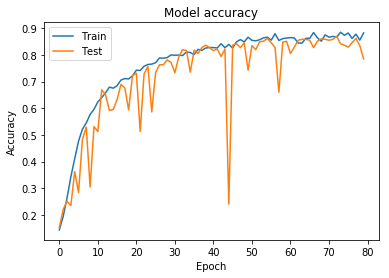

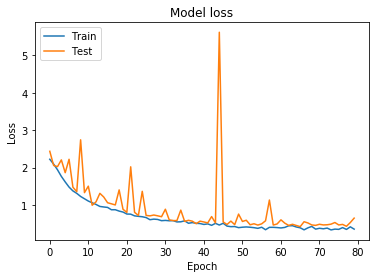

In [145]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [146]:
# serialize model to JSON
model_json = model.to_json()
with open("./trained_models/hdf5/spectrogram_simple_nn_urban_sound_model.json", "w") as json_file:
    json_file.write(model_json)

In [147]:
# serialize weights to HDF5
model.save_weights("./trained_models/hdf5/spectrogram_simple_nn_urban_sound_model.h5")
print("Saved model to disk")

Saved model to disk
